In [42]:
# Load the dataset:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [43]:
# Load the Dataset:
heart_df=pd.read_excel("/content/heart_disease.xlsx",sheet_name="Heart_disease")
print(heart_df.head())

   age   sex               cp  trestbps  chol    fbs         restecg  thalch  \
0   63  Male   typical angina       145   233   True  lv hypertrophy     150   
1   41  Male  atypical angina       135   203  False          normal     132   
2   57  Male     asymptomatic       140   192  False          normal     148   
3   52  Male   typical angina       118   186  False  lv hypertrophy     190   
4   57  Male     asymptomatic       110   201  False          normal     126   

   exang  oldpeak        slope          thal  num  
0  False      2.3  downsloping  fixed defect    0  
1  False      0.0         flat  fixed defect    0  
2  False      0.4         flat  fixed defect    0  
3  False      0.0         flat  fixed defect    0  
4   True      1.5         flat  fixed defect    0  


In [44]:
# EDA(Exploratory Data Analysis):
print(heart_df.info())
print(heart_df.describe())
print(heart_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB
None
              age    trestbps        chol      thalch     oldpeak         num
count  908.000000  908.000000  908.000000  908.000000  846.000000  908.000000
mean    53.791850  133.430617  201.484581  135.957048    0.891253    1.008811

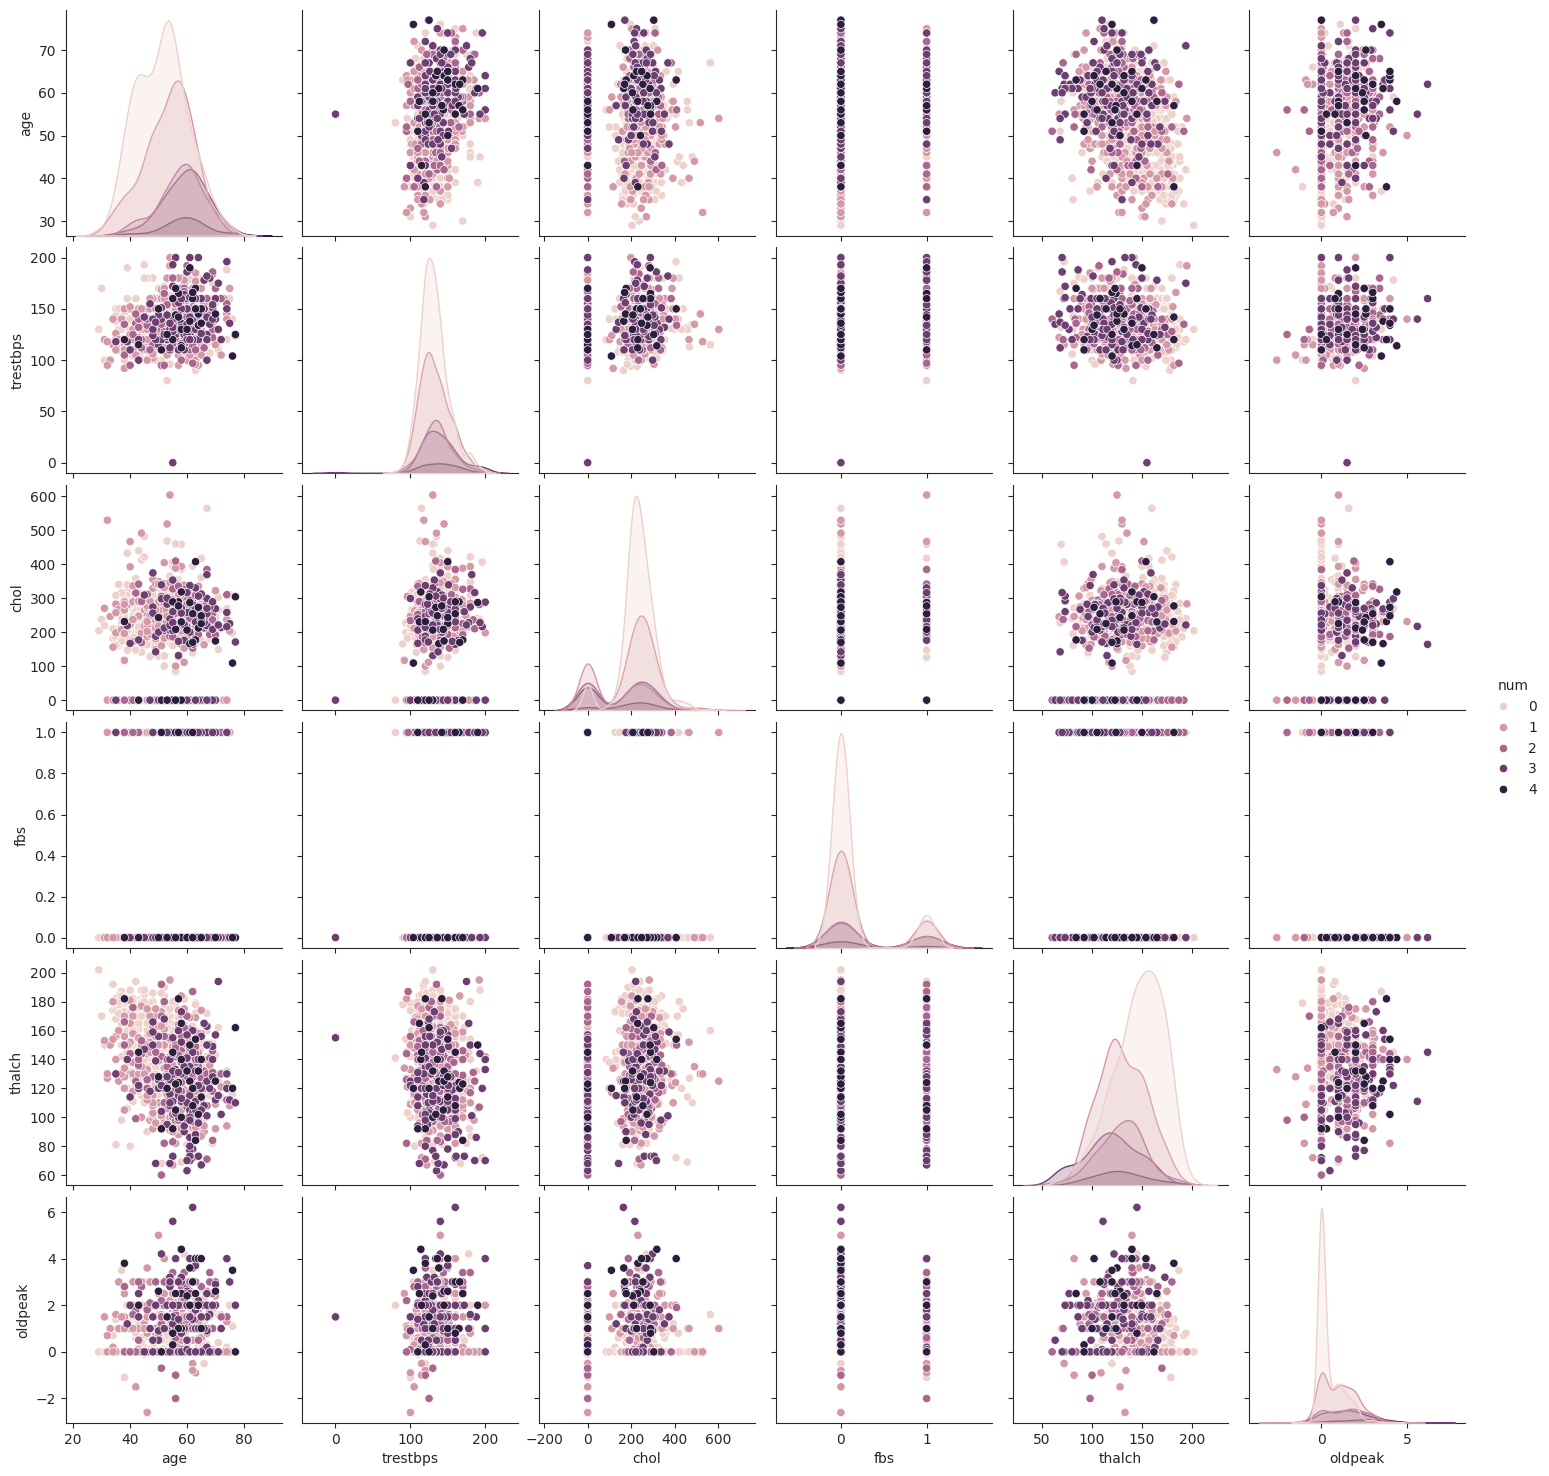

In [64]:
# Visualization:
sns.pairplot(heart_df,hue='num')
plt.savefig("pairplot.png")
plt.show()

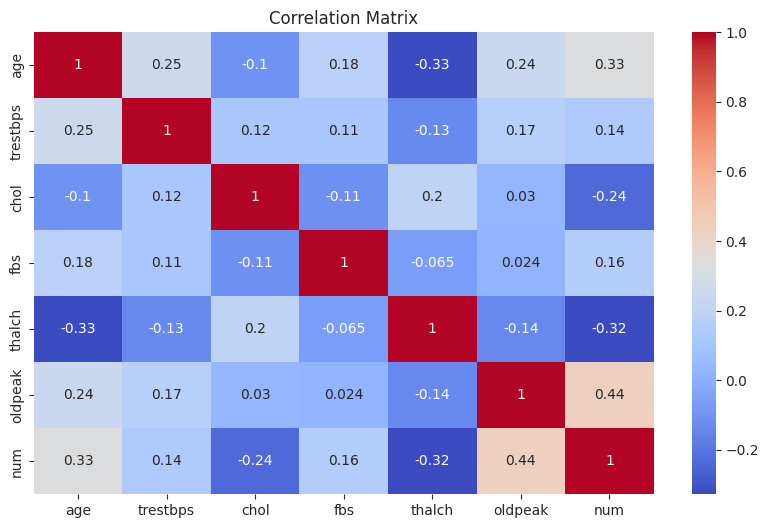

In [63]:
plt.figure(figsize=(10,6))
sns.heatmap(heart_df.corr(numeric_only=True),annot=True,cmap="coolwarm")
sns.set_style("ticks")
plt.title("Correlation Matrix")
plt.savefig("heatmap.png")
plt.show()

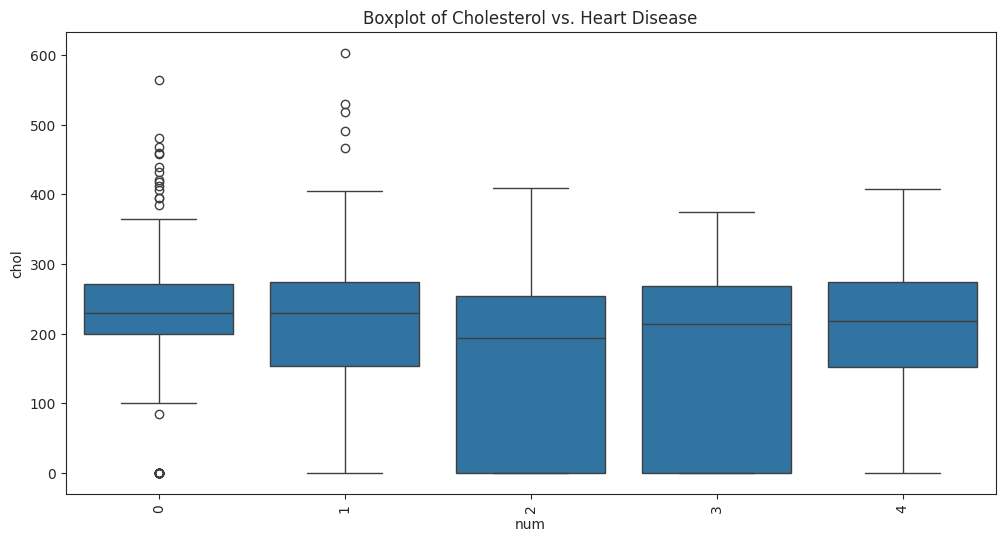

In [62]:
plt.figure(figsize=(12,6))
sns.boxplot(x="num",y="chol",data=heart_df)
plt.xticks(rotation=90)
plt.title("Boxplot of Cholesterol vs. Heart Disease")
plt.savefig("Boxplot.png")
plt.show()

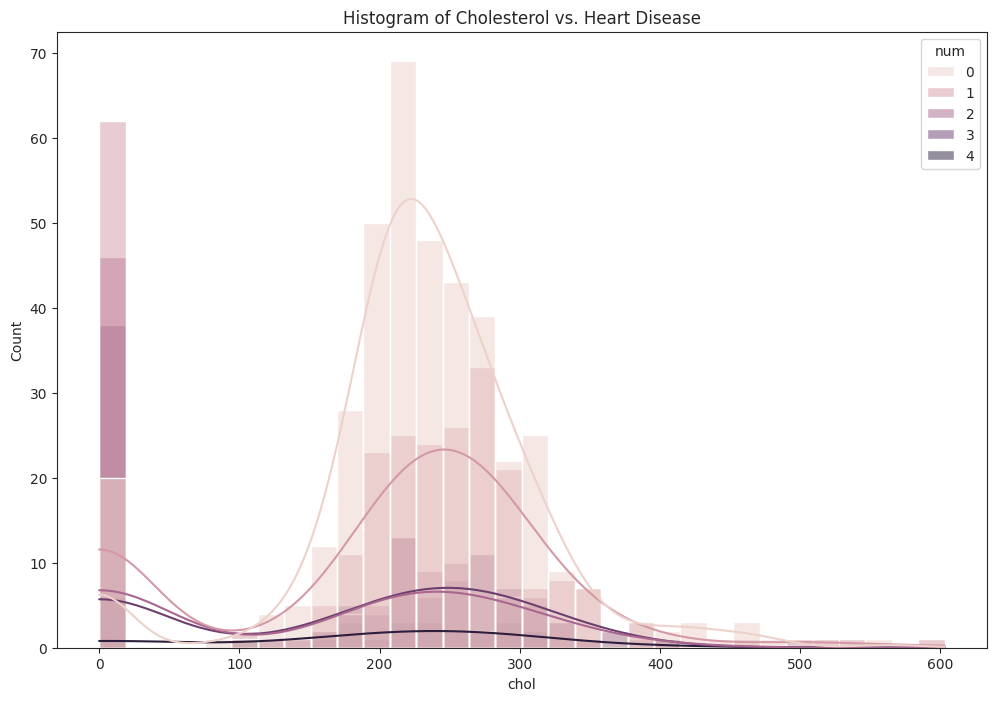

In [61]:
plt.figure(figsize=(12,8))
sns.histplot(heart_df,x="chol",hue="num",kde=True)
plt.title("Histogram of Cholesterol vs. Heart Disease")
plt.savefig("histogram.png")
plt.show()

In [49]:
# Feature Engineering:
Le=LabelEncoder()
df_encode=heart_df.copy()
for col in df_encode.columns:
  if df_encode[col].dtype=="object" or df_encode[col].dtype=="bool":
    df_encode[col]=Le.fit_transform(df_encode[col].astype(str))




In [50]:
# Seperate features and targets:
df_encode["num"]=df_encode["num"].apply(lambda x:1 if x>0 else 0)
X=df_encode.drop("num",axis=1)
y=df_encode["num"]

In [51]:
# Scaler feature:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)


In [52]:
# Train-test-split:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)


In [53]:
# Decision Tree Classification:
dt_model=DecisionTreeClassifier()
z=dt_model.fit(X_train,y_train)
y_pred=dt_model.predict(X_test)
print("\nClassification report result:")
print(classification_report(y_test,y_pred))
print("\nConfusion matrix result:")
print(confusion_matrix(y_test,y_pred))
print("\naccuracy score result:")
print(accuracy_score(y_test,y_pred))


Classification report result:
              precision    recall  f1-score   support

           0       0.70      0.73      0.71        89
           1       0.73      0.70      0.71        93

    accuracy                           0.71       182
   macro avg       0.71      0.71      0.71       182
weighted avg       0.71      0.71      0.71       182


Confusion matrix result:
[[65 24]
 [28 65]]

accuracy score result:
0.7142857142857143


In [54]:
# Hyperparameter Tuning:
param_grid={
    "max_depth":[None,5,10,15],
    "min_samples_split":[2,5,10],
    "criterion":["gini","entropy"]

}
Grid_search=GridSearchCV(DecisionTreeClassifier(random_state=42),param_grid,cv=5)
Grid_search.fit(X_train,y_train)
print("\nBest Parameters:")
print(Grid_search.best_params_)


Best Parameters:
{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 10}


In [55]:
# Evaluate best model:
best_model=Grid_search.best_estimator_
y_pred_best=best_model.predict(X_test)
print("\nTuned Decision Tree Classification Report:")
print(classification_report(y_test,y_pred_best))
print("\nAccuracy Score")
print(accuracy_score(y_test,y_pred_best))



Tuned Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76        89
           1       0.77      0.76      0.77        93

    accuracy                           0.76       182
   macro avg       0.76      0.76      0.76       182
weighted avg       0.76      0.76      0.76       182


Accuracy Score
0.7637362637362637


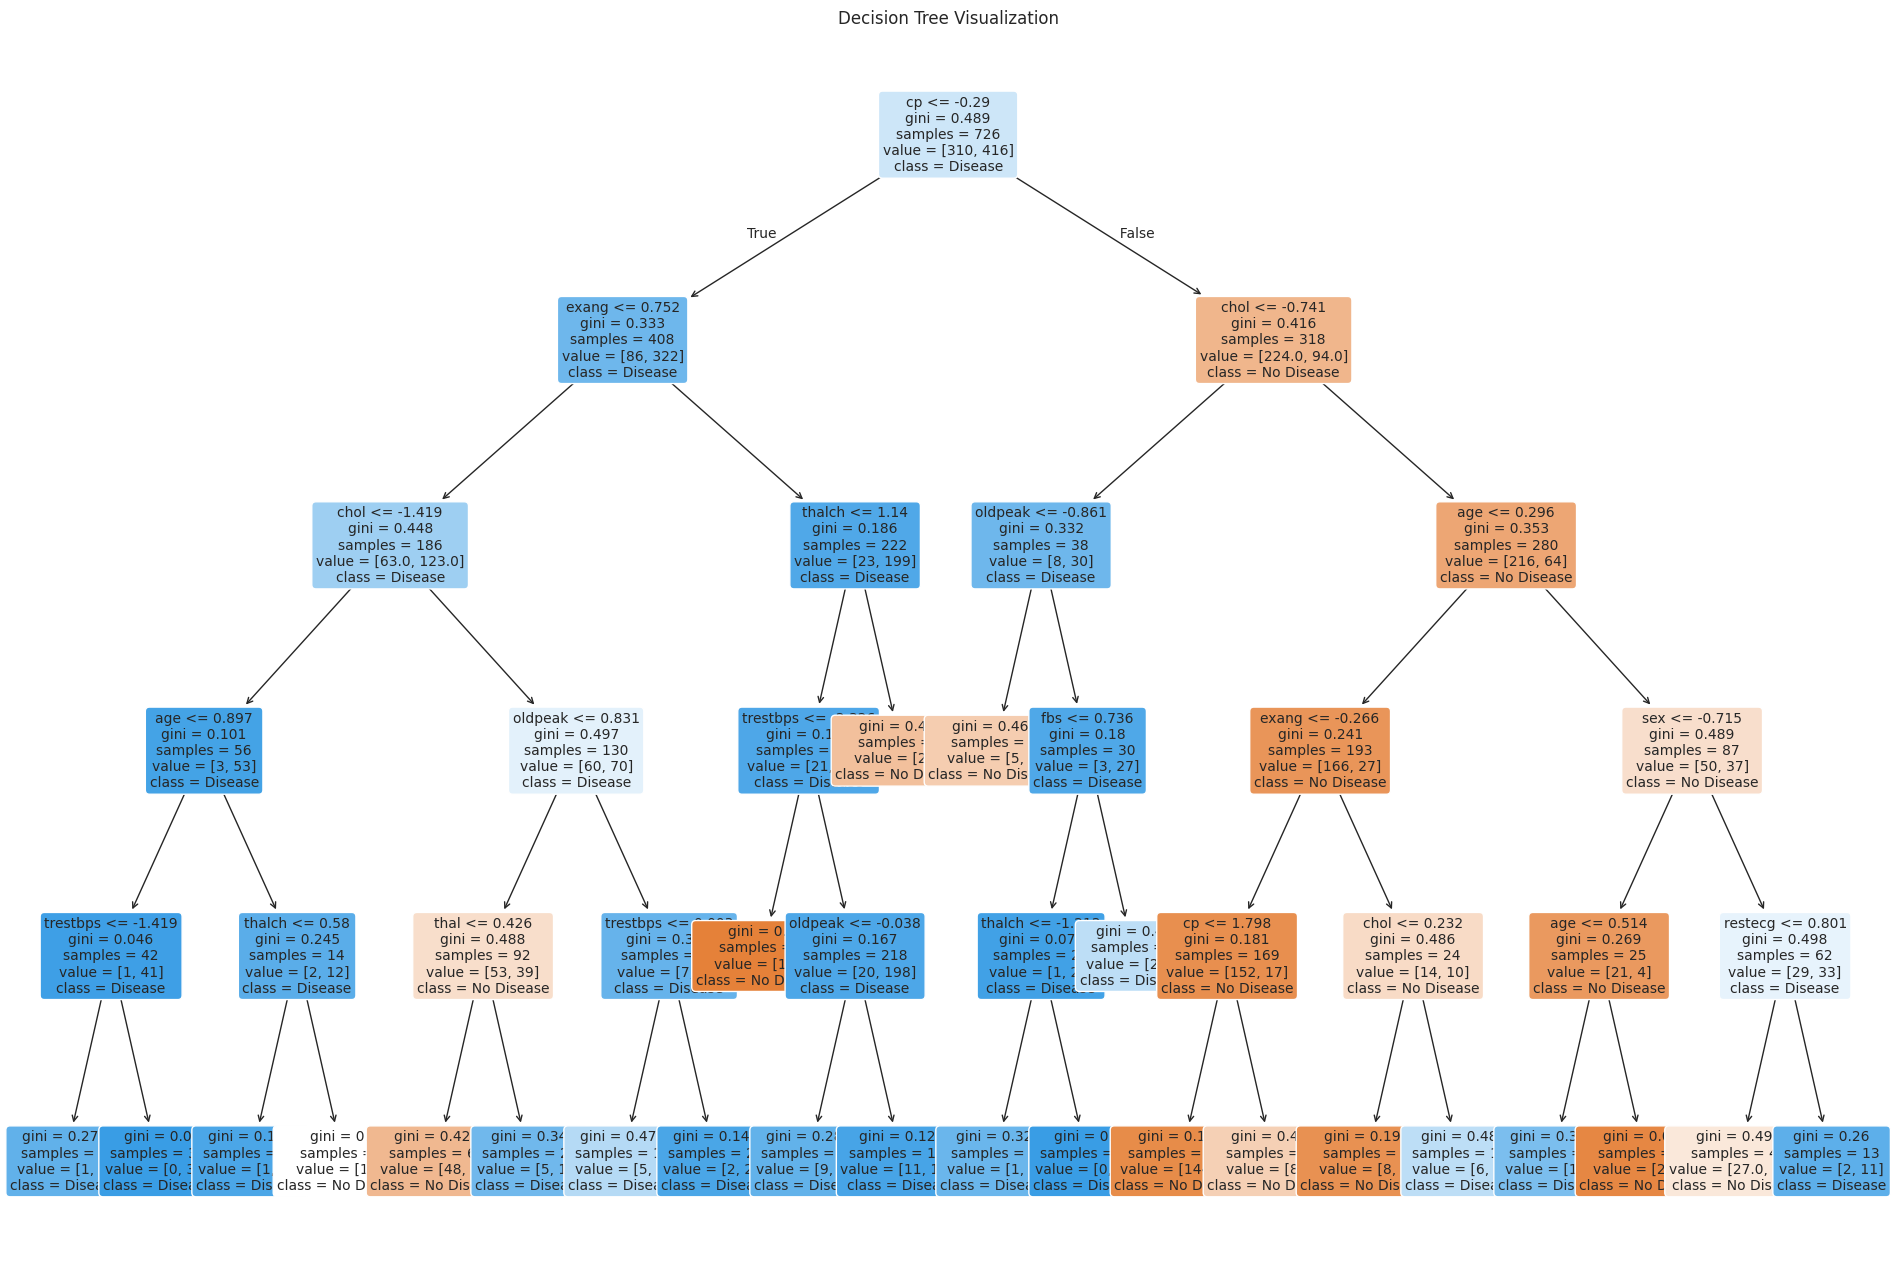

In [60]:
# Last step visualize the decision tree:
plt.figure(figsize=(24,16))
plot_tree(best_model,filled=True,feature_names=X.columns,class_names=["No Disease","Disease"],fontsize=10,rounded=True)
plt.title("Decision Tree Visualization")
plt.savefig("decision_tree.png")
plt.show()

1. Common Hyperparameters of Decision Tree Models & Their Effects
Hyperparameter	Description	Effect on Performance
max_depth	Maximum depth of the tree	Prevents overfitting if too deep; too shallow may underfit
min_samples_split	Minimum number of samples required to split a node	Higher values = more general model; lowers overfitting
min_samples_leaf	Minimum samples a leaf node must have	Ensures leaf nodes aren't based on small, noisy data
criterion	Function to measure quality of split: 'gini' (default) or 'entropy'	Affects how splits are made; both work similarly, but may give slight differences
max_features	Number of features to consider at each split	Controls randomness, can help regularize the model
splitter	Strategy to choose the split at each node: 'best' or 'random'	'random' adds randomness (can help avoid local overfitting)

 To sum up:

 Too complex → overfitting

 Too simple → underfitting

2. Label Encoding vs One-Hot Encoding
Feature	Label Encoding	One-Hot Encoding
What it does	Converts categories to integers (e.g., Red=0, Blue=1)	Creates binary columns for each category
Example	["low", "medium", "high"] → [0, 1, 2]	["low", "medium"] → [[1,0], [0,1]]
Use case	Ordinal data (e.g., size: small < medium < large)	Nominal data (no order, e.g., color, country)
Risk	Adds false sense of order between categories	Increases dimensionality but prevents misinterpretation
Scikit-learn method	LabelEncoder()	pd.get_dummies() or OneHotEncoder()

